In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy.io import wavfile
import os
import numpy as np

IMPORTING FILE

Audio data shape is
(35280, 2)


Text(0.5, 1.0, 'Audio signal in time')

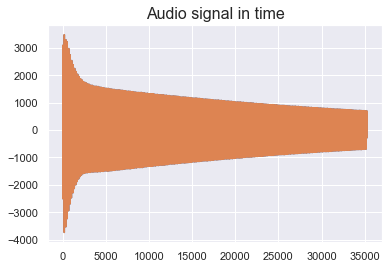

In [2]:
SampleName = "01 - [Prologue]_1.wav" # Audio File
os.chdir('./Training_data/')
SampleRate, Audiodata = wavfile.read(SampleName)

print('Audio data shape is')
print(np.shape(Audiodata))

# Plot the audio signal in time
plt.plot(Audiodata)
plt.title('Audio signal in time',size=16)

FAST FOURIER TRANSFORM \& SPECTRUM

FFT of audio data shape is
(8192,)


(0.0, 1.0)

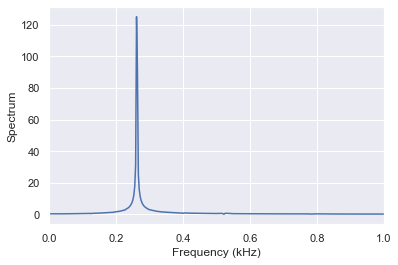

In [3]:
# spectrum
from scipy.fft import fft # fourier transform
m = len(Audiodata) 
FFTSize = 8192 # have to use a multiple of 2 for optimal speed.
#AudioFreq = fft(Audiodata,n=FFTSize,axis=0)
AudioFreq = fft(Audiodata[:,1]*np.hanning(np.shape(Audiodata)[0]),n=FFTSize,axis=0) #with a Hanning window
AudioFreq = AudioFreq[0:int(np.ceil((np.shape(AudioFreq)[0])/2.0))] #Left half of the spectrum
MagFreq = np.abs(AudioFreq) # Magnitude
MagFreq = MagFreq / float(m)

print('FFT of audio data shape is')
print(np.shape(MagFreq))

plt.figure()
freqAxis = np.arange(0,int(np.ceil((m+1)/2.0)), int(np.ceil((m+1)/2.0))*2/FFTSize) * (SampleRate / m);
#freqAxis = np.arange(0,int(np.ceil((m+1)/2.0)), int(np.ceil((m+1)/2.0))/FFTSize) * (SampleRate / m);
plt.plot(freqAxis/1000.0, MagFreq) #Spectrum
plt.xlabel('Frequency (kHz)'); plt.ylabel('Spectrum');
plt.xlim([0, 1])

POWER SPECTRUM

(0.0, 1.0)

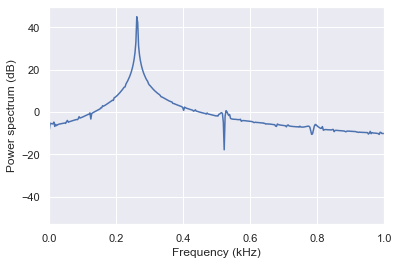

In [4]:
# power spectrum
MagFreq = MagFreq**2
if m % 2 > 0: # ffte odd 
    MagFreq[1:len(MagFreq)] = MagFreq[1:len(MagFreq)] * 2
else:# fft even
    MagFreq[1:len(MagFreq) -1] = MagFreq[1:len(MagFreq) - 1] * 2 

plt.figure()
plt.plot(freqAxis/1000.0, 10*np.log10(MagFreq)) #Power spectrum
plt.xlabel('Frequency (kHz)'); plt.ylabel('Power spectrum (dB)');
plt.xlim([0, 1])

FINDING THE FUNDAMENTAL FREQUENCY

In [5]:
# HPS (Harmonic Product Spectrum) Algorithm to determine fundamental frequency

HPCSize = int(np.ceil(len(MagFreq))/5.0 + 1)

MagFreq2 = MagFreq.copy().reshape(int(np.ceil(len(MagFreq))/2.0),2).mean(1)[0:HPCSize]
print(np.shape(MagFreq2))
MagFreq3 = np.concatenate([MagFreq.copy(),np.zeros(3 - int(len(MagFreq)) % 3)]).reshape(int(np.ceil(len(MagFreq))/3.0 + 1),3).mean(1)[0:HPCSize]
print(np.shape(MagFreq3))

HPC = MagFreq[0:HPCSize]*MagFreq2*MagFreq3
HPCLog = np.log10(MagFreq[0:HPCSize])*np.log10(MagFreq2)*np.log10(MagFreq3)

FFLocation = np.argmax(HPC)
FFLocationLog = np.argmax(HPCLog)
print('Fundamental frequency\'s location is at index... ',FFLocation)
print('Fundamental frequency is...',freqAxis[FFLocation],'Hz.')
print('(Using power spectrum) Fundamental frequency\'s location is at index... ',FFLocationLog)
print('(Using power spectrum) Fundamental frequency is...',freqAxis[FFLocationLog],'Hz.')

(1639,)
(1639,)
Fundamental frequency's location is at index...  48
Fundamental frequency is... 129.20654296875 Hz.
(Using power spectrum) Fundamental frequency's location is at index...  97
(Using power spectrum) Fundamental frequency is... 261.1048889160156 Hz.


DIMENSION-REDUCTION STEPS

In [7]:
# Next, make an integer-indexed array for first several integer multiples of the FF!

MaxLoc = np.where(MagFreq == np.amax(MagFreq))[0][0]

MaxRatio = np.round(freqAxis[MaxLoc]/freqAxis[FFLocation])
MaxRatioLog = np.round(freqAxis[MaxLoc]/freqAxis[FFLocationLog])
print('The loudest ratio is ',MaxRatio)
print('(Using power spectrum) The loudest ratio is ',MaxRatioLog)

numberSpikes = 20

reducedSpectrum = [MagFreq[FFLocationLog*i] for i in np.arange(0,numberSpikes) ]
print(reducedSpectrum)

reducedPowerSpectrum = 10*np.log10(reducedSpectrum)
print(reducedPowerSpectrum)

The loudest ratio is  0.0
(Using power spectrum) The loudest ratio is  1.0
[0.14825868519466448, 31289.537626989302, 0.016272370533243312, 0.08698945010261555, 0.05517337907498934, 0.041707985156028284, 0.03129768510871895, 0.022559027626089332, 0.017395415392865845, 0.013374613075305809, 0.012206852685739629, 0.009564684144283204, 0.008145183215660356, 0.007002468790592113, 0.0067232336472136806, 0.005186561318344075, 0.006192096273670326, 0.004223996854390953, 0.0048803744157722585, 0.0033658000735541822]
[ -8.28979856  44.95399146 -17.88549175 -10.60533415 -12.58270417
 -13.7978079  -15.04487783 -16.46679624 -17.59565196 -18.73718773
 -19.13396297 -20.19329367 -20.89099142 -21.54748818 -21.72421796
 -22.85120483 -22.081623   -23.74276414 -23.11546858 -24.72911684]
